### Importando las librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn import metrics
import plotly.express as px #bigotes
#Importación grafica de matriz de confusión
import seaborn as sns
#nuevas importaciones
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
#importar librería para SMOTE
import imblearn


### Cargando el dataset como csv

In [ ]:
from google.colab import files
import io
archivo=files.upload()
dataframe=pd.read_csv(io.BytesIO(archivo['HCV-Egy-Data.csv']),delimiter=",")

Saving HCV-Egy-Data.csv to HCV-Egy-Data.csv


### Creando copias del dataframe

In [ ]:
dataframecopia=dataframe
dataframecopia2=dataframe
dataframecopia3=dataframe
dataframecopia4=dataframe
#dataframecopia

### Corriendo arboles de decision original

In [ ]:
y=dataframecopia['Baselinehistological staging']
#x=dataframecopia3.drop(['Age ','BMI','WBC', 'RBC','HGB','Plat','AST 1','ALT 1','ALT4','ALT 12','ALT 24','ALT 36','ALT 48','ALT after 24 w','RNA Base','RNA 4','RNA 12','RNA EOT','RNA EF','Baselinehistological staging','Baseline histological Grading'],axis=1)
x=dataframecopia.drop(['Baselinehistological staging','Baseline histological Grading'],axis=1)
XTrain,XTest,yTrain,yTest=train_test_split(x,y,test_size=0.2,random_state=27)
## 'gini', 'entropy', 'log_loss'
#max_depth=7, min_samples_leaf=2, min_samples_split=2
modelo=DecisionTreeClassifier(criterion='log_loss')
modelo.fit(XTrain,yTrain)
yPredict=modelo.predict(XTrain)
print("Train Accuracy ",metrics.accuracy_score(yTrain,yPredict))

yPredict=modelo.predict(XTest)
print("Test Accuracy ",metrics.accuracy_score(yTest,yPredict))

Train Accuracy  1.0
Test Accuracy  0.2743682310469314


###Matriz de arboles de decision versión original

[[16 15 20 14]
 [17 20 23 15]
 [13 17 15 23]
 [11 19 14 25]]
Especificidad F1: 0.24615384615384617
Especificidad F2 0.26666666666666666
Especificidad F3: 0.22058823529411764
Especificidad F4: 0.36231884057971014


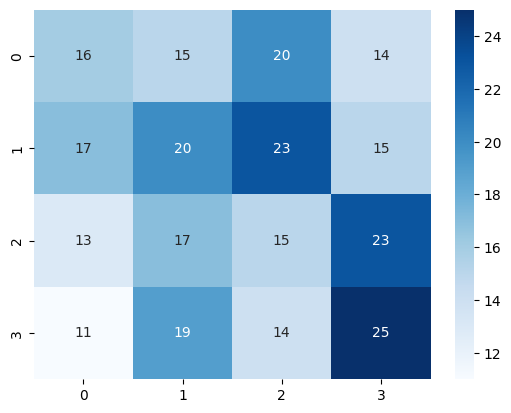

In [ ]:
matriz=confusion_matrix(yTest,yPredict)
print(matriz)
sb.heatmap(matriz,annot=True,cmap="Blues")

especificidad_1 = matriz[0,0]/(matriz[0,0]+matriz[0,:].sum()-matriz[0,0])
especificidad_2 = matriz[1,1]/(matriz[1,1]+matriz[1,:].sum()-matriz[1,1])
especificidad_3 =  matriz[2,2]/(matriz[2,2]+matriz[2,:].sum()-matriz[2,2])
especificidad_4 =  matriz[3,3]/(matriz[3,3]+matriz[3,:].sum()-matriz[3,3])

print("Especificidad F1:",especificidad_1)
print("Especificidad F2",especificidad_2)
print("Especificidad F3:",especificidad_3)
print("Especificidad F4:",especificidad_4)

### Metricas de Arboles de decision versión original

In [ ]:
precision_recall_fscore_support(yTest,yPredict,average=None)
etiquetas=["F1","F2","F3","F4"]
print(classification_report(yTest,yPredict,target_names=etiquetas))
print("Accuracy=",modelo.score(XTest,yTest))

              precision    recall  f1-score   support

          F1       0.28      0.25      0.26        65
          F2       0.28      0.27      0.27        75
          F3       0.21      0.22      0.21        68
          F4       0.32      0.36      0.34        69

    accuracy                           0.27       277
   macro avg       0.27      0.27      0.27       277
weighted avg       0.27      0.27      0.27       277

Accuracy= 0.2743682310469314


### Generando arbol grafico

In [ ]:
export_graphviz(modelo,out_file="arbol.dot",class_names=etiquetas,impurity=False,filled=True)

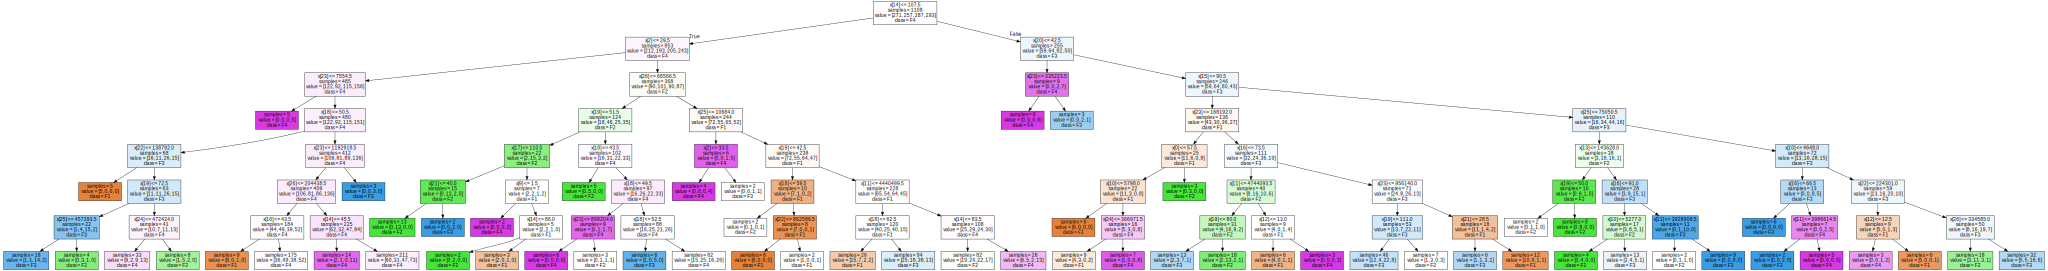

In [ ]:
with open("arbol.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

### Validación Cruzada del arbol de decision original

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, x, y, cv=5)
print(scores)
print(scores.mean())

[0.23104693 0.25631769 0.24187726 0.22021661 0.23465704]
0.23682310469314077


### Arboles con SMOTE version original

In [ ]:
from imblearn.over_sampling import SMOTE
y=dataframecopia2['Baselinehistological staging']
#dataframecopia3.drop('Baselinehistological staging', axis=1)
x=dataframecopia2.drop(['Baseline histological Grading', 'Baselinehistological staging'],axis=1)

num_rep=4
datasets_equilibrados=[]
for i in range(2**num_rep):
  smote = SMOTE(random_state=i)
  x_resampled, y_resampled= smote.fit_resample(x,y)
  datasets_equilibrados.append({'x':x_resampled , 'y':y_resampled})

x_combinados= pd.concat([data['x'] for data in datasets_equilibrados], axis=0)
y_combinados= pd.concat([data['y'] for data in datasets_equilibrados], axis=0)
XTrain,XTest,yTrain,yTest=train_test_split(x_combinados,y_combinados,test_size=0.2,random_state=6)

modelo=DecisionTreeClassifier(criterion='log_loss')
modelo.fit(XTrain,yTrain)
yPredict=modelo.predict(XTrain)
print("Train Accuracy ",metrics.accuracy_score(yTrain,yPredict))

yPredict=modelo.predict(XTest)
print("Test Accuracy ",metrics.accuracy_score(yTest,yPredict))

Train Accuracy  1.0
Test Accuracy  0.9838152783772119


### Matriz de decision version original con SMOTE

[[1093   14   10    9]
 [  14 1145   12    2]
 [   5    3 1156    6]
 [   0    0    0 1165]]
Especificidad F1: 0.9706927175843695
Especificidad F2 0.9761295822676896
Especificidad F3: 0.9880341880341881
Especificidad F4: 1.0


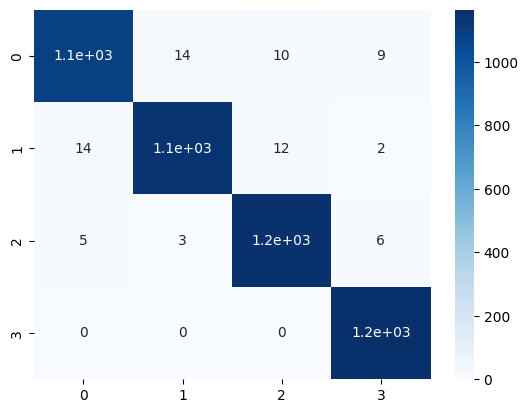

In [ ]:
matriz=confusion_matrix(yTest,yPredict)
print(matriz)
sb.heatmap(matriz,annot=True,cmap="Blues")

especificidad_1 = matriz[0,0]/(matriz[0,0]+matriz[0,:].sum()-matriz[0,0])
especificidad_2 = matriz[1,1]/(matriz[1,1]+matriz[1,:].sum()-matriz[1,1])
especificidad_3 =  matriz[2,2]/(matriz[2,2]+matriz[2,:].sum()-matriz[2,2])
especificidad_4 =  matriz[3,3]/(matriz[3,3]+matriz[3,:].sum()-matriz[3,3])

print("Especificidad F1:",especificidad_1)
print("Especificidad F2",especificidad_2)
print("Especificidad F3:",especificidad_3)
print("Especificidad F4:",especificidad_4)

### Metricas de arboles de decision con SMOTE version original

In [ ]:
precision_recall_fscore_support(yTest,yPredict,average=None)
etiquetas=["F1","F2","F3","F4"]
print(classification_report(yTest,yPredict,target_names=etiquetas))
print("Accuracy=",modelo.score(XTest,yTest))

              precision    recall  f1-score   support

          F1       0.98      0.97      0.98      1126
          F2       0.99      0.98      0.98      1173
          F3       0.98      0.99      0.98      1170
          F4       0.99      1.00      0.99      1165

    accuracy                           0.98      4634
   macro avg       0.98      0.98      0.98      4634
weighted avg       0.98      0.98      0.98      4634

Accuracy= 0.9838152783772119


### Validacion cruzada con SMOTE

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, x, y, cv=5)
print(scores)
print(scores.mean())

[0.24187726 0.20216606 0.26353791 0.25631769 0.27797834]
0.24837545126353794


### Eliminación de variables de la OMS

In [ ]:
y=dataframecopia3['Baselinehistological staging']
#dataframecopia3.drop('Baselinehistological staging', axis=1)
x=dataframecopia3.drop(['Age ','BMI','WBC', 'RBC','HGB','Plat','AST 1','ALT 1','ALT4','ALT 12','ALT 24','ALT 36','ALT 48','ALT after 24 w','RNA Base','RNA 4','RNA 12','RNA EOT','RNA EF','Baselinehistological staging','Baseline histological Grading'],axis=1)
modelo=DecisionTreeClassifier(criterion='log_loss')
modelo.fit(XTrain,yTrain)
yPredict=modelo.predict(XTrain)
print("Train Accuracy ",metrics.accuracy_score(yTrain,yPredict))

yPredict=modelo.predict(XTest)
print("Test Accuracy ",metrics.accuracy_score(yTest,yPredict))

Train Accuracy  1.0
Test Accuracy  0.9827362969356928


### Matriz de confusion con eliminiación de variables

[[1090   17   11    8]
 [  17 1143    9    4]
 [   6    2 1156    6]
 [   0    0    0 1165]]
Especificidad F1: 0.9680284191829485
Especificidad F2 0.9744245524296675
Especificidad F3: 0.9880341880341881
Especificidad F4: 1.0


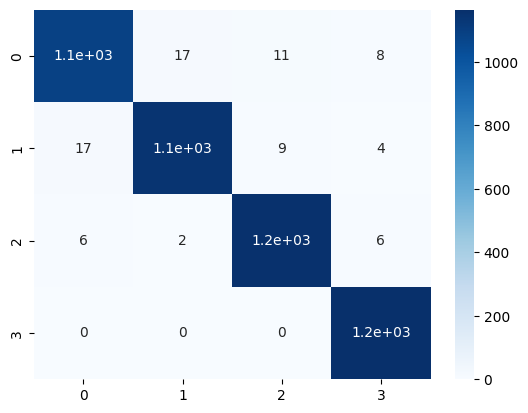

In [ ]:
matriz=confusion_matrix(yTest,yPredict)
print(matriz)
sb.heatmap(matriz,annot=True,cmap="Blues")

especificidad_1 = matriz[0,0]/(matriz[0,0]+matriz[0,:].sum()-matriz[0,0])
especificidad_2 = matriz[1,1]/(matriz[1,1]+matriz[1,:].sum()-matriz[1,1])
especificidad_3 =  matriz[2,2]/(matriz[2,2]+matriz[2,:].sum()-matriz[2,2])
especificidad_4 =  matriz[3,3]/(matriz[3,3]+matriz[3,:].sum()-matriz[3,3])

print("Especificidad F1:",especificidad_1)
print("Especificidad F2",especificidad_2)
print("Especificidad F3:",especificidad_3)
print("Especificidad F4:",especificidad_4)

### Métricas con eliminacion de variables

In [ ]:
precision_recall_fscore_support(yTest,yPredict,average=None)
etiquetas=["F1","F2","F3","F4"]
print(classification_report(yTest,yPredict,target_names=etiquetas))
print("Accuracy=",modelo.score(XTest,yTest))

              precision    recall  f1-score   support

          F1       0.98      0.97      0.97      1126
          F2       0.98      0.97      0.98      1173
          F3       0.98      0.99      0.99      1170
          F4       0.98      1.00      0.99      1165

    accuracy                           0.98      4634
   macro avg       0.98      0.98      0.98      4634
weighted avg       0.98      0.98      0.98      4634

Accuracy= 0.9827362969356928


### Validacion cruzada con eliminacion de variables

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, x, y, cv=5)
print(scores)
print(scores.mean())

[0.26353791 0.26353791 0.23465704 0.27436823 0.24187726]
0.25559566787003607


### Eliminación de variables dejando solo las de OMS y usando SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
y=dataframecopia4['Baselinehistological staging']
#dataframecopia3.drop('Baselinehistological staging', axis=1)
x=dataframecopia4.drop(['Age ','BMI','WBC', 'RBC','HGB','Plat','AST 1','ALT 1','ALT4','ALT 12','ALT 24','ALT 36','ALT 48','ALT after 24 w','RNA Base','RNA 4','RNA 12','RNA EOT','RNA EF','Baselinehistological staging','Baseline histological Grading'],axis=1)

num_rep=4
datasets_equilibrados=[]
for i in range(2**num_rep):
  smote = SMOTE(random_state=i)
  x_resampled, y_resampled= smote.fit_resample(x,y)
  datasets_equilibrados.append({'x':x_resampled , 'y':y_resampled})

x_combinados= pd.concat([data['x'] for data in datasets_equilibrados], axis=0)
y_combinados= pd.concat([data['y'] for data in datasets_equilibrados], axis=0)
XTrain,XTest,yTrain,yTest=train_test_split(x_combinados,y_combinados,test_size=0.2,random_state=6)

modelo=DecisionTreeClassifier(criterion='log_loss')
modelo.fit(XTrain,yTrain)
yPredict=modelo.predict(XTrain)
print("Train Accuracy ",metrics.accuracy_score(yTrain,yPredict))

yPredict=modelo.predict(XTest)
print("Test Accuracy ",metrics.accuracy_score(yTest,yPredict))

Train Accuracy  0.4780943131542031
Test Accuracy  0.45899870522227015


### Matriz de confusion con SMOTE Y eliminacion de varibales

[[541 236 156 193]
 [214 588 197 174]
 [225 244 494 207]
 [266 242 153 504]]
Especificidad F1: 0.48046181172291297
Especificidad F2 0.5012787723785166
Especificidad F3: 0.4222222222222222
Especificidad F4: 0.43261802575107294


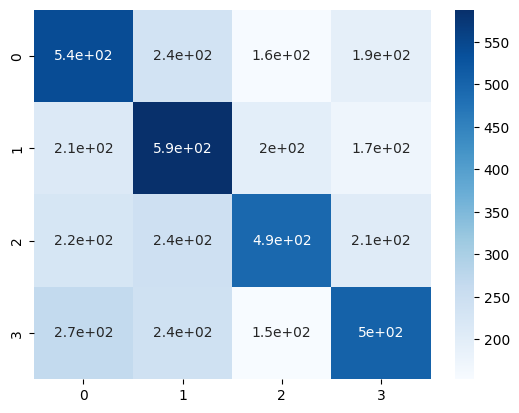

In [ ]:
matriz=confusion_matrix(yTest,yPredict)
print(matriz)
sb.heatmap(matriz,annot=True,cmap="Blues")

especificidad_1 = matriz[0,0]/(matriz[0,0]+matriz[0,:].sum()-matriz[0,0])
especificidad_2 = matriz[1,1]/(matriz[1,1]+matriz[1,:].sum()-matriz[1,1])
especificidad_3 =  matriz[2,2]/(matriz[2,2]+matriz[2,:].sum()-matriz[2,2])
especificidad_4 =  matriz[3,3]/(matriz[3,3]+matriz[3,:].sum()-matriz[3,3])

print("Especificidad F1:",especificidad_1)
print("Especificidad F2",especificidad_2)
print("Especificidad F3:",especificidad_3)
print("Especificidad F4:",especificidad_4)

### Metricas con SMOTE y eliminación de variables

In [ ]:
precision_recall_fscore_support(yTest,yPredict,average=None)
etiquetas=["F1","F2","F3","F4"]
print(classification_report(yTest,yPredict,target_names=etiquetas))
print("Accuracy=",modelo.score(XTest,yTest))

              precision    recall  f1-score   support

          F1       0.43      0.48      0.46      1126
          F2       0.45      0.50      0.47      1173
          F3       0.49      0.42      0.46      1170
          F4       0.47      0.43      0.45      1165

    accuracy                           0.46      4634
   macro avg       0.46      0.46      0.46      4634
weighted avg       0.46      0.46      0.46      4634

Accuracy= 0.45899870522227015


### Validacion cruzada con SMOTE y eliminacion de variables

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, x, y, cv=5)
print(scores)
print(scores.mean())

[0.20938628 0.24548736 0.22743682 0.23104693 0.22382671]
0.22743682310469318
